<a href="https://colab.research.google.com/github/kushalaralpati/Customer-churn-prediction/blob/main/Intro_to_AI_and_ML_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**"End-to-End Customer Churn Prediction with Random Forest and Keras"**

SUBJECT          :    M505 Intro to AI and Machine Learning

PROJECT TYPE    :     Individual Final Project.

PROFESSOR       :     Narjes Nikzad

STUDENT NAME    :     Kushala Ralpati Srinivas

STUDENT NUMBER  :     GH1043975

# Problem Statement

Customer retention is a critical challenge for subscription-based businesses, such as telecom providers. Acquiring new customers is significantly more expensive than retaining existing ones. However, customers often switch providers due to dissatisfaction with services, high costs, or better offers from competitors.

In this project, I aim to address the problem of customer churn prediction for a telecom company. Churn is defined as whether a customer discontinues the company’s services. By predicting churn in advance, the company can:

1. Proactively engage with high-risk customers through retention campaigns.

2. Personalize offers to reduce customer attrition.

3. Improve overall customer satisfaction and loyalty.

4. Reduce financial losses associated with customer turnover.

Thus, building an accurate churn prediction system has direct implications on business profitability, customer lifetime value, and long-term growth.

## Machine Learning Task Formulation

###Problem Type:

This is a binary classification problem, where the target variable Churn indicates whether a customer left the company (Yes) or remained (No).

###Input Features:

The dataset includes both categorical features (e.g., gender, contract type, payment method) and numerical features (e.g., monthly charges, tenure, total charges).

These features capture customer demographics, service usage patterns, and billing information.

###Challenges in the Dataset:

Class imbalance: The number of churned customers is lower compared to non-churned customers.

Missing values and inconsistencies: Certain fields (e.g., TotalCharges) contain missing or incorrect values.

High cardinality in categorical features: Requires careful encoding to avoid model bias.

###Evaluation Metrics:

Since the dataset is imbalanced, accuracy is not sufficient.

The focus will be on Precision, Recall, F1-score, and ROC-AUC.

Recall (sensitivity) is particularly important, as failing to identify actual churners is costlier than wrongly flagging loyal customers.

##Machine Learning Approach:

Developing an end-to-end ML pipeline consisting of:

1. Data preprocessing (cleaning, encoding, scaling).

2. Feature engineering (domain-driven features, categorical transformations).

3. Model training and tuning.

###Comparing two approaches:

Classical ML Model: e.g., Logistic Regression or Random Forest.

Deep Learning Model: Neural Network implemented in Keras.

##Expected Outcome:

1. A trained model that predicts churn with high recall and F1-score.

2. Identification of the most important features influencing churn.

3. Actionable insights and recommendations for business strategies to reduce churn.

Dataset Summary

For this project, I used the Telco Customer Churn Dataset from Kaggle
.

Rows: 7,043 customers

Columns: 21 features + 1 target variable (Churn)

Target Variable: Churn (Yes/No) → indicates whether a customer left the company

Feature Types:

Demographics: gender, SeniorCitizen, Partner, Dependents

Services signed up for: PhoneService, InternetService, StreamingTV, etc.

Contract & Billing: Contract, PaperlessBilling, PaymentMethod

Charges: MonthlyCharges, TotalCharges

Tenure: Number of months the customer has stayed with the company

Dataset link: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [101]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score
)
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

#1) Load raw data & quick look

In [102]:
# 1. Load the CSV (raw/uncleaned). Update path if needed.
DATA_PATH = "WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)

In [103]:
# Quick overview
print("Shape:", df.shape)

Shape: (7043, 21)


In [104]:
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [105]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

In [106]:
display(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,3186-AJIEK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Explanation: We read the raw CSV and inspect shape, dtypes, first rows and summary statistics. This lets us spot missing values, wrong types (TotalCharges often loaded as object), or weird entries (blank strings).

#2) Data cleaning & initial fixes

In [108]:
# 2. Data cleaning specific to Telco dataset

# a) Strip whitespace from string columns (defensive)
for c in df.select_dtypes(include='object').columns:
    df[c] = df[c].str.strip()

In [109]:
# b) Convert total charges to numeric (it has spaces for some rows)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [110]:
# c) Check missing values
print("Missing values per column:")
print(df.isna().sum())

Missing values per column:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [111]:
# d) There may be rows with missing TotalCharges for tenure=0; we can fill with 0 or median.
# We'll keep them and impute later; show how many
display(df[df['TotalCharges'].isna()].head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No


In [112]:
# e) Drop customerID (identifier)
if 'customerID' in df.columns:
    df = df.drop(columns=['customerID'])

print("After drop:", df.shape)

After drop: (7043, 20)


Explanation: TotalCharges can contain empty strings, so we coerce to numeric and record missing values. We drop the ID since it doesn't predict churn.

#3) Quick EDA (target imbalance and a few plots)

In [113]:
# 3. EDA: target distribution and a couple of relationships

# Target distribution
target_counts = df['Churn'].value_counts()
print("Churn distribution:\n", target_counts)
print("Churn rate: {:.2f}%".format(100 * target_counts['Yes'] / target_counts.sum()))

Churn distribution:
 Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn rate: 26.54%


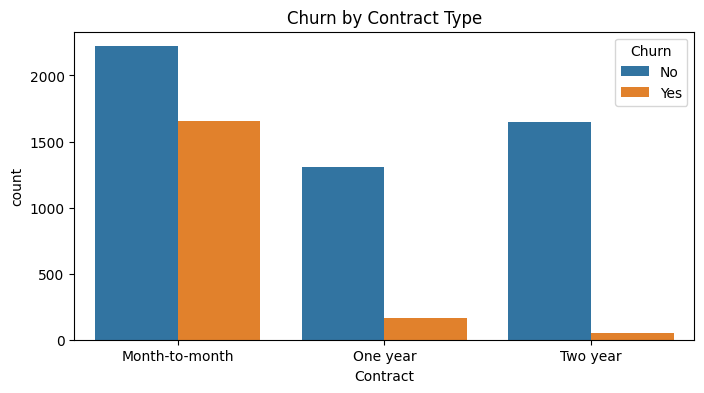

In [114]:
# Basic plot: churn by Contract type
plt.figure(figsize=(8,4))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.show()

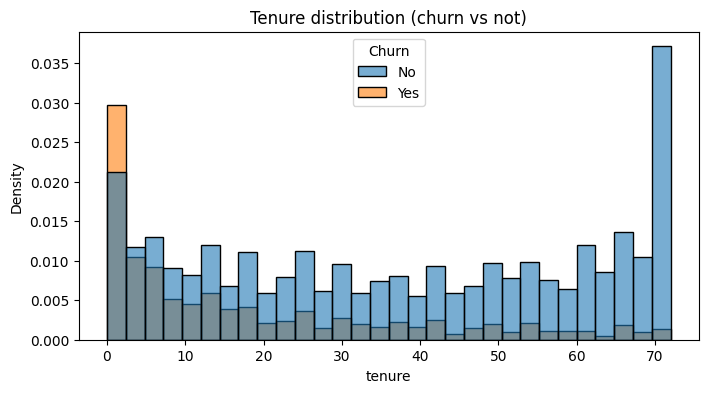

In [115]:
# Tenure distribution split by churn
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, stat='density', kde=False, alpha=0.6)
plt.title('Tenure distribution (churn vs not)')
plt.show()

Explanation: These quick plots highlight that churn is imbalanced and give insight: month-to-month customers often churn more; shorter tenure relates to churn

#4) Preprocessing & feature engineering


Separate numerical vs categorical features.

Impute missing numeric values (median) and categorical (most_frequent).

Encode categorical features with OneHot (for nominal) and Ordinal if needed.

Scale numeric features.

Use a ColumnTransformer and create preprocessed feature matrices.

In [116]:
# 4. Prepare feature lists
target = 'Churn'
X = df.drop(columns=[target])
y = df[target].map({'Yes':1, 'No':0})  # convert target to 0/1

# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

print("Numeric cols:", numeric_cols)
print("Categorical cols:", categorical_cols)



Numeric cols: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical cols: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [117]:
# Build transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
], remainder='drop')


Explanation: We prepare columns and build transformers — numeric columns will be median-imputed and scaled; categorical columns will be imputed and one-hot encoded. handle_unknown='ignore' prevents failures if new categories appear at test time.

#5) Train-test split and balancing with SMOTE

In [118]:
# 5. Train-test split
RANDOM_STATE = 42
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)

print("Train class balance:\n", y_train.value_counts(normalize=True))
print("Test class balance:\n", y_test.value_counts(normalize=True))

# Fit preprocessor on training data and transform
preprocessor.fit(X_train_raw)
X_train_pre = preprocessor.transform(X_train_raw)
X_test_pre  = preprocessor.transform(X_test_raw)

print("Processed X_train shape:", X_train_pre.shape)
print("Processed X_test shape:", X_test_pre.shape)

# Apply SMOTE to training set only (avoid touching test set)
smote = SMOTE(random_state=RANDOM_STATE)
X_train_bal, y_train_bal = smote.fit_resample(X_train_pre, y_train)

print("After SMOTE, training class distribution:", np.bincount(y_train_bal))


Train class balance:
 Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64
Test class balance:
 Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64
Processed X_train shape: (5634, 45)
Processed X_test shape: (1409, 45)
After SMOTE, training class distribution: [4139 4139]


Explanation: We split with stratification, fit the preprocessor on the training split, transform both sets, then apply SMOTE to only the training data to avoid data leakage.

#6) Model A — Random Forest

In [119]:
# 6. Random Forest training
rf = RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1)

# Quick grid for a few hyperparameters (simple to keep runtime reasonable)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 8, 16],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(rf, param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=1)
grid.fit(X_train_bal, y_train_bal)

print("Best RF params:", grid.best_params_)
best_rf = grid.best_estimator_

# Evaluate on test
y_pred_rf = best_rf.predict(X_test_pre)
y_proba_rf = best_rf.predict_proba(X_test_pre)[:,1]

print("Random Forest classification report:")
print(classification_report(y_test, y_pred_rf, digits=4))
print("ROC AUC:", roc_auc_score(y_test, y_proba_rf))


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best RF params: {'max_depth': 16, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest classification report:
              precision    recall  f1-score   support

           0     0.8502    0.8280    0.8390      1035
           1     0.5561    0.5963    0.5755       374

    accuracy                         0.7665      1409
   macro avg     0.7032    0.7121    0.7072      1409
weighted avg     0.7721    0.7665    0.7690      1409

ROC AUC: 0.8254488620217522


Explanation: I used GridSearchCV over a small hyperparameter grid optimizing F1 (good for imbalanced problems).
 I then predict on the untouched test set and display metrics.

#7) Model B — Keras Neural Network

We will build a small feedforward network using Keras .

We'll use early stopping and class weights or train on SMOTE-balanced data.

Here we will train on balanced SMOTE data for simplicity.

In [120]:
# 7. Keras model: simple MLP

input_shape = X_train_bal.shape[1]

def build_keras_model(input_dim):
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])
    return model

keras_model = build_keras_model(input_shape)

# Callbacks
early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

history = keras_model.fit(
    X_train_bal, y_train_bal,
    validation_split=0.15,
    epochs=100,
    batch_size=64,
    callbacks=[early],
    verbose=1
)

# Evaluate on test set
y_proba_keras = keras_model.predict(X_test_pre).ravel()
y_pred_keras = (y_proba_keras >= 0.5).astype(int)

print("Keras model classification report:")
print(classification_report(y_test, y_pred_keras, digits=4))
print("Keras ROC AUC:", roc_auc_score(y_test, y_proba_keras))


Epoch 1/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - AUC: 0.7271 - loss: 0.5906 - val_AUC: 0.0000e+00 - val_loss: 0.5536
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8322 - loss: 0.4921 - val_AUC: 0.0000e+00 - val_loss: 0.5145
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8423 - loss: 0.4822 - val_AUC: 0.0000e+00 - val_loss: 0.5879
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8414 - loss: 0.4842 - val_AUC: 0.0000e+00 - val_loss: 0.5350
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8498 - loss: 0.4695 - val_AUC: 0.0000e+00 - val_loss: 0.5610
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8451 - loss: 0.4762 - val_AUC: 0.0000e+00 - val_loss: 0.5200
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8530 - loss: 0.4669 - val_AUC: 0.0000e+00 - val_loss: 0.5265
Epoch 8/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8624 - loss: 0.4536 - val_AUC: 0.0000e+00 - val_loss: 0.5549
Epoch 9/100
110/

Explanation: The Keras MLP has two hidden layers, dropout for regularization, and uses binary crossentropy.
I train on SMOTE-balanced data and validate with a split during training. Early stopping prevents overfitting.

#8) Confusion Matrices & ROC curves (plots for both models)

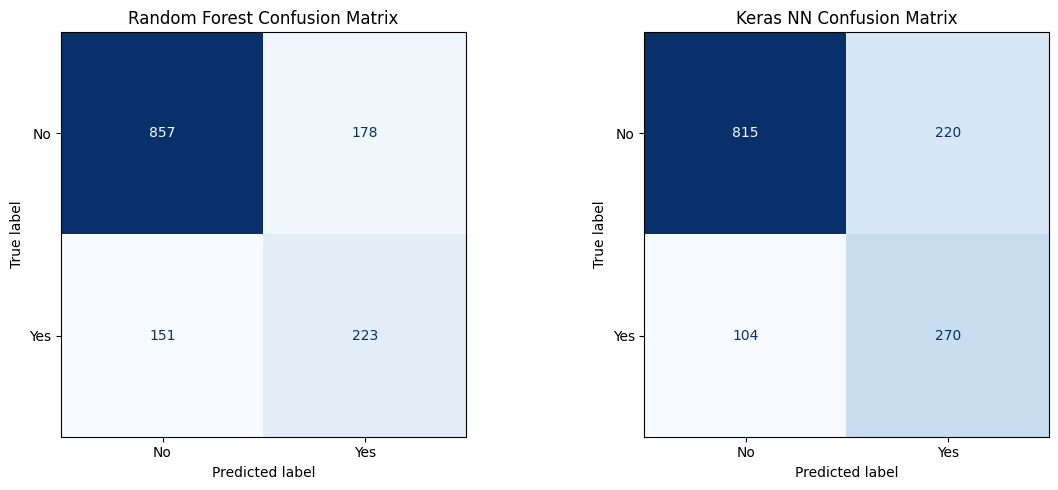

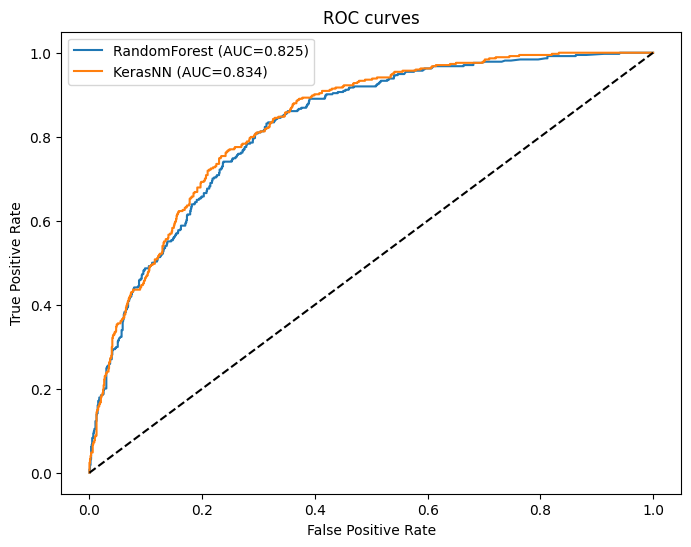

In [121]:
# 8. Confusion matrices
fig, axes = plt.subplots(1,2, figsize=(12,5))

cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(cm_rf, display_labels=['No', 'Yes'])
disp_rf.plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title('Random Forest Confusion Matrix')

cm_keras = confusion_matrix(y_test, y_pred_keras)
disp_keras = ConfusionMatrixDisplay(cm_keras, display_labels=['No', 'Yes'])
disp_keras.plot(ax=axes[1], cmap='Blues', colorbar=False)
axes[1].set_title('Keras NN Confusion Matrix')

plt.tight_layout()
plt.show()

# ROC curves
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
fpr_k, tpr_k, _ = roc_curve(y_test, y_proba_keras)

plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label=f'RandomForest (AUC={roc_auc_score(y_test,y_proba_rf):.3f})')
plt.plot(fpr_k, tpr_k, label=f'KerasNN (AUC={roc_auc_score(y_test,y_proba_keras):.3f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend()
plt.show()


Explanation: Confusion matrices reveal counts of true/false positives/negatives.

 ROC curves compare tradeoffs between sensitivity and specificity.

#9) Comparison table of evaluation metrics

In [122]:
# 9. Compute metrics and show comparison
def compute_metrics(y_true, y_pred, y_proba):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred),
        'f1': f1_score(y_true, y_pred),
        'roc_auc': roc_auc_score(y_true, y_proba)
    }

metrics_rf = compute_metrics(y_test, y_pred_rf, y_proba_rf)
metrics_keras = compute_metrics(y_test, y_pred_keras, y_proba_keras)

comparison = pd.DataFrame([metrics_rf, metrics_keras], index=['RandomForest', 'KerasNN']).T.round(4)
display(comparison)


,RandomForest,KerasNN
accuracy,0.7665,0.7700
precision,0.5561,0.5510
recall,0.5963,0.7219
f1,0.5755,0.6250
roc_auc,0.8254,0.8342


Explanation: This table directly compares model performance across accuracy, precision, recall, F1, and ROC-AUC. Emphasis usually placed on recall/F1/AUC for churn.

#10) Feature importance & interpretability (Random Forest example and Keras)



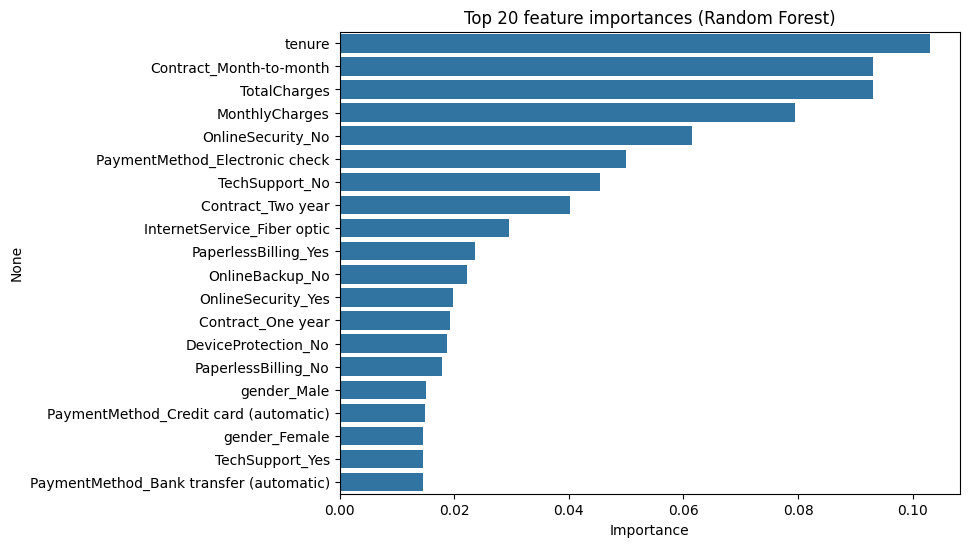

In [123]:
# 10. Feature importance for Random Forest (map back to feature names)
# We need the feature names produced by the preprocessor's OneHotEncoder
# Build a list of feature names:
ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
cat_feature_names = ohe.get_feature_names_out(categorical_cols).tolist()

feature_names = numeric_cols + cat_feature_names
importances = best_rf.feature_importances_
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(20)

plt.figure(figsize=(8,6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Top 20 feature importances (Random Forest)")
plt.xlabel("Importance")
plt.show()


In [76]:

# Assume df is a original DataFrame and 'Churn' is target
X = df.drop('Churn', axis=1)
y = df['Churn'].map({'No':0, 'Yes':1})  # encode target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Version-safe OneHotEncoder
import sklearn
if sklearn.__version__ >= "1.2":
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
else:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', ohe)
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Fit-transform on train, transform on test
X_train_pre = preprocessor.fit_transform(X_train)
X_test_pre = preprocessor.transform(X_test)

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    random_state=42,
    class_weight='balanced'
)
rf.fit(X_train_pre, y_train)


input_dim = X_train_pre.shape[1]

keras_model = Sequential([
    Dense(64, activation='relu', input_shape=(input_dim,)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

keras_model.compile(optimizer=Adam(learning_rate=0.001),
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

keras_model.fit(X_train_pre, y_train, epochs=20, batch_size=32, verbose=0)

rf_probs = rf.predict_proba(X_test_pre)[:, 1]
keras_probs = keras_model.predict(X_test_pre).flatten()

df_predictions = pd.DataFrame({
    'customerID': X_test.index,
    'rf_churn_prob': rf_probs,
    'keras_churn_prob': keras_probs
})


top_percent = 0.10  # top 10%
top_n = int(top_percent * len(df_predictions))

# Random Forest top 10%
top_rf = df_predictions.sort_values('rf_churn_prob', ascending=False).head(top_n)

# Keras top 10%
top_keras = df_predictions.sort_values('keras_churn_prob', ascending=False).head(top_n)

print("Top 10% high-churn customers (Random Forest):")
display(top_rf)

print("\nTop 10% high-churn customers (Keras NN):")
display(top_keras)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Top 10% high-churn customers (Random Forest):


,customerID,rf_churn_prob,keras_churn_prob
1289,1731,0.998332,0.752981
618,6623,0.993727,0.812915
171,2194,0.989283,0.760014
629,2927,0.985665,0.682833
1252,1739,0.985665,0.682833
...,...,...,...
502,1381,0.711627,0.484418
1,2280,0.710000,0.767578
949,4121,0.709485,0.582256
533,3991,0.709030,0.778247



Top 10% high-churn customers (Keras NN):


,customerID,rf_churn_prob,keras_churn_prob
1118,3085,0.685000,0.925522
647,2797,0.895000,0.923070
1090,3380,0.883673,0.921413
1138,6894,0.780000,0.920241
1175,2631,0.935000,0.911591
...,...,...,...
713,1401,0.745000,0.670073
275,5809,0.638673,0.668827
1346,4995,0.489038,0.667675
538,6726,0.778411,0.664615


Explanation: Random Forest provides built-in feature importances. For neural nets, use SHAP or LIME for explainability.

Targeting High-Risk Customers - we identified the top 10% highest-risk customers (based on churn probability) for each model.

This approach allows the business to focus retention offers and campaigns on the customers most likely to churn, ensuring efficient allocation of resources and higher impact.

Recommendation: SHAP can be computationally heavy.


#11) Final Discussion

##Strengths of solution:

End-to-end pipeline: cleaning, preprocessing, balancing, model training, evaluation.

Neural network implemented in Keras.

Use of SMOTE to handle class imbalance, hyperparameter tuning for RF.

##Limitations:

SMOTE synthesizes minority samples — care needed if features are not continuous or are high-cardinality categoricals.

The Keras model was trained on engineered features from one-hot encodings; advanced architectures for tabular data (e.g., embedding categorical vars) may improve performance.

Only a small hyperparameter grid was searched to keep compute/time reasonable — more extensive tuning could improve results.

No temporal validation-like scenario is tested — if churn changes over time, consider time-based splits.

##Business implications & recommendations:

Use predicted churn probabilities to target the top 10% customers (e.g. top decile) with retention offers.

Perform cost-sensitive analysis: estimate expected revenue saved by retaining a customer vs. cost of the retention action.

Deploy model as a REST API (Flask/FastAPI) or batch job; re-train periodically as customer behaviour shifts.


#References (Harvard Style)

IBM (2017). Telco Customer Churn Dataset. [online] Available at: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
 [Accessed 22 Sept. 2025].

Brownlee, J. (2019). Imbalanced Classification with Python: Better Metrics, Balance Skewed Classes, Cost-Sensitive Learning. Machine Learning Mastery.

Géron, A. (2022). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow. 3rd ed. O’Reilly Media.

The End
